# Goal
### Clean and preprocess the collected data to remove errors, handle missing values, and transform it into a suitable format for analysis. 
**Tasks**: data cleaning, data integration, data transformation etc

### *2018 Data* 

In [174]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
# read the 2018 baywheels data
baywheels_df = pd.read_csv('baywheels_2018', low_memory=False, index_col=0)

In [175]:
# convert the start_time and end_time object into datetime64 objects
baywheels_df['start_time'] = pd.to_datetime(baywheels_df['start_time'], 
                                                format="Date: %d/%m/%y; Time: %H:%M:%S", errors='coerce')
baywheels_df['end_time'] = pd.to_datetime(baywheels_df['end_time'], 
                                                format="Date: %d/%m/%y; Time: %H:%M:%S", errors='coerce')

In [176]:
baywheels_df

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
0,2018-04-26 18:04:41,2018-04-26 18:10:07,11.0,37.79728,-122.398436,6.0,37.80477,-122.403234,2530.0
1,2018-05-18 19:34:12,2018-05-18 19:37:57,64.0,37.7767539,-122.3990176,321.0,37.7801457035,-122.4030708524,3643.0
2,2018-07-14 14:57:05,2018-07-14 15:10:37,70.0,37.7733108789,-122.4442926049,109.0,37.7633158,-122.4219039,1964.0
3,2018-11-11 16:35:22,2018-11-11 16:45:37,160.0,37.8053183,-122.2948365,220.0,37.8113514,-122.2734217,3580.0
4,2018-12-15 10:15:24,2018-12-15 10:20:23,72.0,37.772406,-122.4356498,119.0,37.7610471,-122.4326417,5247.0
...,...,...,...,...,...,...,...,...,...
1863726,2018-05-09 08:23:45,2018-05-09 08:29:02,30.0,37.776598,-122.395282,36.0,37.78383,-122.39887,369.0
1863727,2018-12-22 19:28:59,2018-12-22 19:40:22,146.0,37.7423139,-122.4231805,98.0,37.765052,-122.4218661,2940.0
1863728,2018-05-05 10:49:33,2018-05-05 11:03:30,122.0,37.760299,-122.418892,121.0,37.7592103,-122.4213392,2095.0
1863729,2018-05-09 08:55:21,2018-05-09 09:11:35,25.0,37.7875217805,-122.3974049091,123.0,37.7605936,-122.4148171,3570.0


### Handling missing values

In [177]:
# number of Na values 
baywheels_df.isna().sum().sum()

23562

In [178]:
baywheels_df.dtypes

start_time           datetime64[ns]
end_time             datetime64[ns]
start_station_id             object
start_station_lat            object
start_station_lon            object
end_station_id               object
end_station_lat              object
end_station_lon              object
bike_id                      object
dtype: object

In [179]:
baywheels_df.head(2)

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
0,2018-04-26 18:04:41,2018-04-26 18:10:07,11.0,37.79728,-122.398436,6.0,37.80477,-122.403234,2530.0
1,2018-05-18 19:34:12,2018-05-18 19:37:57,64.0,37.7767539,-122.3990176,321.0,37.7801457035,-122.4030708524,3643.0


In [180]:
#identify the NaT values in start_time
na_start_values = baywheels_df['start_time'].isna()
na_start_rows = baywheels_df[na_start_values]

na_start_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
439433,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
481488,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
689379,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
896954,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
959289,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1291280,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1500621,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1525798,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1604523,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1861419,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure


In [181]:
#identify the NaT values in end_time
na_end_values = baywheels_df['end_time'].isna()
na_end_rows = baywheels_df[na_end_values]

na_end_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
439433,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
481488,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
689379,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
896954,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
959289,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1291280,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1500621,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1525798,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1604523,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1861419,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure


In [182]:
na_rows = pd.concat([na_start_rows, na_end_rows])

na_rows # the rows with missing values are the same for both columns (10 rows)

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
439433,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
481488,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
689379,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
896954,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
959289,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1291280,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1500621,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1525798,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1604523,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1861419,NaT,NaT,Failure,Failure,Failure,Failure,Failure,Failure,Failure


In [183]:
# check the start_time column
baywheels_df['start_time']

0         2018-04-26 18:04:41
1         2018-05-18 19:34:12
2         2018-07-14 14:57:05
3         2018-11-11 16:35:22
4         2018-12-15 10:15:24
                  ...        
1863726   2018-05-09 08:23:45
1863727   2018-12-22 19:28:59
1863728   2018-05-05 10:49:33
1863729   2018-05-09 08:55:21
1863730   2018-02-08 18:01:18
Name: start_time, Length: 1863731, dtype: datetime64[ns]

In [184]:
# drop the NaT values
baywheels_df.dropna(subset=['start_time'], inplace=True)

In [185]:
# check the start_time column after dropna
baywheels_df['start_time']

0         2018-04-26 18:04:41
1         2018-05-18 19:34:12
2         2018-07-14 14:57:05
3         2018-11-11 16:35:22
4         2018-12-15 10:15:24
                  ...        
1863726   2018-05-09 08:23:45
1863727   2018-12-22 19:28:59
1863728   2018-05-05 10:49:33
1863729   2018-05-09 08:55:21
1863730   2018-02-08 18:01:18
Name: start_time, Length: 1863721, dtype: datetime64[ns]

In [186]:
# add a column 'duration' to baywheels_df
length_of_trip = baywheels_df['end_time'] - baywheels_df['start_time']
baywheels_df['duration'] = pd.DataFrame(length_of_trip)


In [187]:
baywheels_df.head(2)

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,duration
0,2018-04-26 18:04:41,2018-04-26 18:10:07,11.0,37.79728,-122.398436,6.0,37.80477,-122.403234,2530.0,0 days 00:05:26
1,2018-05-18 19:34:12,2018-05-18 19:37:57,64.0,37.7767539,-122.3990176,321.0,37.7801457035,-122.4030708524,3643.0,0 days 00:03:45


In [188]:
# duration column is a time delta object
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 1863730
Data columns (total 10 columns):
 #   Column             Dtype          
---  ------             -----          
 0   start_time         datetime64[ns] 
 1   end_time           datetime64[ns] 
 2   start_station_id   object         
 3   start_station_lat  object         
 4   start_station_lon  object         
 5   end_station_id     object         
 6   end_station_lat    object         
 7   end_station_lon    object         
 8   bike_id            object         
 9   duration           timedelta64[ns]
dtypes: datetime64[ns](2), object(7), timedelta64[ns](1)
memory usage: 156.4+ MB


In [189]:
# show min, max, mean values 
min = baywheels_df['duration'].min()
mean = baywheels_df['duration'].mean()
max = baywheels_df['duration'].max()
print('min:',min)
print('max:',max)
print('mean:',mean)

min: -1 days +23:02:51
max: 0 days 23:59:26
mean: 0 days 00:14:17.797020047


In [190]:
pd.Timedelta(0)


Timedelta('0 days 00:00:00')

In [191]:
# show negative duration values 
negative_values = baywheels_df[baywheels_df['duration'] < pd.Timedelta(0)]
negative_values #the durations are negative because of the change between summer time and
                #winter time at Sunday 4th November

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,duration
223042,2018-11-04 01:48:20,2018-11-04 01:02:58,59.0,37.774814,-122.418954,27.0,37.7880593,-122.3918648,2331.0,-1 days +23:14:38
840962,2018-11-04 01:52:40,2018-11-04 01:02:27,375.0,37.7748362941,-122.4465456605,95.0,37.7662185,-122.4310597,3144.0,-1 days +23:09:47
1129000,2018-11-04 01:51:00,2018-11-04 01:06:56,183.0,37.8087021,-122.2699271,149.0,37.8312752,-122.2856333,417.0,-1 days +23:15:56
1131781,2018-11-04 01:59:54,2018-11-04 01:07:50,67.0,37.7766392,-122.3955263,37.0,37.7849997283,-122.3959356175,1497.0,-1 days +23:07:56
1238539,2018-11-04 01:58:47,2018-11-04 01:01:38,132.0,37.7518194,-122.4266139,134.0,37.7524278,-122.4206278,2487.0,-1 days +23:02:51
1511289,2018-11-04 01:59:01,2018-11-04 01:02:48,41.0,37.78127,-122.41874,61.0,37.7765126,-122.4113061,2136.0,-1 days +23:03:47


In [192]:
# add 1 hour to the affected columns
rows_to_add_1hour = [223042, 840962, 1129000, 1131781, 1238539, 1511289]
for row_index in rows_to_add_1hour:
    baywheels_df.loc[row_index, 'end_time'] += pd.Timedelta(hours=1)
    print(baywheels_df.loc[row_index, 'end_time'])

2018-11-04 02:02:58
2018-11-04 02:02:27
2018-11-04 02:06:56
2018-11-04 02:07:50
2018-11-04 02:01:38
2018-11-04 02:02:48


In [193]:
# update the duration column
length_of_trip = baywheels_df['end_time'] - baywheels_df['start_time']
baywheels_df['duration'] = pd.DataFrame(length_of_trip)

In [194]:
#check if it worked
negative_values = baywheels_df[baywheels_df['duration'] < pd.Timedelta(0)]
negative_values

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,duration


In [197]:
# check the minimum again
min = baywheels_df['duration'].min()
min

Timedelta('0 days 00:01:01')

In [143]:
# show positive duration values
positive_values = baywheels_df[baywheels_df['duration'] > pd.Timedelta(0)]
positive_values

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,duration
0,2018-04-26 18:04:41,2018-04-26 18:10:07,11.0,37.79728,-122.398436,6.0,37.80477,-122.403234,2530.0,0 days 00:05:26
1,2018-05-18 19:34:12,2018-05-18 19:37:57,64.0,37.7767539,-122.3990176,321.0,37.7801457035,-122.4030708524,3643.0,0 days 00:03:45
2,2018-07-14 14:57:05,2018-07-14 15:10:37,70.0,37.7733108789,-122.4442926049,109.0,37.7633158,-122.4219039,1964.0,0 days 00:13:32
3,2018-11-11 16:35:22,2018-11-11 16:45:37,160.0,37.8053183,-122.2948365,220.0,37.8113514,-122.2734217,3580.0,0 days 00:10:15
4,2018-12-15 10:15:24,2018-12-15 10:20:23,72.0,37.772406,-122.4356498,119.0,37.7610471,-122.4326417,5247.0,0 days 00:04:59
...,...,...,...,...,...,...,...,...,...,...
1863726,2018-05-09 08:23:45,2018-05-09 08:29:02,30.0,37.776598,-122.395282,36.0,37.78383,-122.39887,369.0,0 days 00:05:17
1863727,2018-12-22 19:28:59,2018-12-22 19:40:22,146.0,37.7423139,-122.4231805,98.0,37.765052,-122.4218661,2940.0,0 days 00:11:23
1863728,2018-05-05 10:49:33,2018-05-05 11:03:30,122.0,37.760299,-122.418892,121.0,37.7592103,-122.4213392,2095.0,0 days 00:13:57
1863729,2018-05-09 08:55:21,2018-05-09 09:11:35,25.0,37.7875217805,-122.3974049091,123.0,37.7605936,-122.4148171,3570.0,0 days 00:16:14


In [202]:
#check bike_id for Nan Values
baywheels_df['bike_id'].describe()

count     1863721
unique       5054
top        3961.0
freq         1220
Name: bike_id, dtype: object

In [217]:
#check nan values in bike_id 
nan_bike_id = baywheels_df['bike_id'].isna()
nan_bike_id_rows = baywheels_df[nan_bike_id]
nan_bike_id_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,duration


In [216]:
#check nan values in start_station_id
nan_start_station_id = baywheels_df['start_station_id'].isna()
nan_start_station_id_rows = baywheels_df[nan_start_station_id]
nan_start_station_id_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,duration
401,2018-11-17 13:41:26,2018-11-17 13:44:57,NaN,37.41,-121.95,NaN,37.41,-121.94,4256.0,0 days 00:03:31
532,2018-07-18 21:16:40,2018-07-18 21:20:22,NaN,37.41,-121.95,NaN,37.42,-121.95,4205.0,0 days 00:03:42
674,2018-09-28 09:14:06,2018-09-28 09:23:57,NaN,37.41,-121.96,NaN,37.4,-121.94,4148.0,0 days 00:09:51
825,2018-06-19 19:07:49,2018-06-19 19:50:04,NaN,37.4,-121.93,NaN,37.39,-121.94,4083.0,0 days 00:42:15
941,2018-07-21 09:21:19,2018-07-21 09:30:13,NaN,37.4,-121.94,NaN,37.4,-121.93,4288.0,0 days 00:08:54
...,...,...,...,...,...,...,...,...,...,...
1863397,2018-08-06 19:16:48,2018-08-06 19:22:06,NaN,37.39,-121.93,NaN,37.38,-121.93,4152.0,0 days 00:05:18
1863454,2018-07-16 19:28:52,2018-07-16 19:58:28,NaN,37.41,-121.94,NaN,37.41,-121.95,4117.0,0 days 00:29:36
1863465,2018-07-27 14:48:18,2018-07-27 15:19:20,NaN,37.33,-121.91,NaN,37.35,-121.9,4097.0,0 days 00:31:02
1863492,2018-08-16 19:27:19,2018-08-16 19:42:18,NaN,37.41,-121.96,NaN,37.4,-121.93,4128.0,0 days 00:14:59


In [224]:
#check nan values in start_station_lon
nan_start_station_lon = baywheels_df['start_station_lon'].isna()
nan_start_station_lon_rows = baywheels_df[nan_start_station_lon]
nan_start_station_lon_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,duration


In [225]:
#check nan values in start_station_lat
nan_start_station_lat = baywheels_df['start_station_lat'].isna()
nan_start_station_lat_rows = baywheels_df[nan_start_station_lat]
nan_start_station_lat_rows

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,duration


ValueError: x and y must be the same size

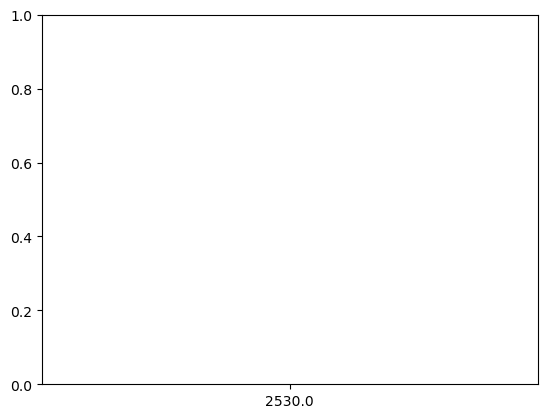

In [209]:
x = baywheels_df['bike_id']
y = baywheels_df['bike_id'].count
plt.subplots()

plt.scatter(x, y)

In [200]:
baywheels_df['start_station_id'].describe()

count     1851950
unique        331
top          15.0
freq        38461
Name: start_station_id, dtype: object

In [201]:
baywheels_df['end_station_id'].describe()

count     1851950
unique        331
top          67.0
freq        50000
Name: end_station_id, dtype: object

### *Weather data*

In [39]:
weather_df = pd.read_csv('SanFrancisco')
weather_df.head(2)

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,San Francisco,2015-01-01 08:56:00,7.0,33.0,Fair,1018.26,6.0,0.0,7.0
1,San Francisco,2015-01-01 09:56:00,4.0,33.0,Fair,1018.60,6.0,0.0,4.0


In [40]:
# check what values are in city columns
weather_df['city'].describe()

count             76631
unique                1
top       San Francisco
freq              76631
Name: city, dtype: object

In [41]:
# we can drop the city column
weather_df.drop(labels='city', axis=1, inplace=True)
weather_df.head(2)

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,2015-01-01 08:56:00,7.0,33.0,Fair,1018.26,6.0,0.0,7.0
1,2015-01-01 09:56:00,4.0,33.0,Fair,1018.60,6.0,0.0,4.0


In [42]:
# filter just values from 2018 year
weather_df.info()
weather_df['timestamp'] = pd.to_datetime(weather_df['timestamp'], format='%Y-%m-%d %H:%M:%S')

start = datetime(year=2018, month=1, day=1)
end = datetime(year=2018, month=12, day=31)

weather_df_18 = weather_df[(weather_df['timestamp'] >= start)&(weather_df['timestamp'] <= end)].copy()
weather_df_18.sort_values(by='timestamp', inplace=True)
weather_df_18

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76631 entries, 0 to 76630
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                76631 non-null  object 
 1   temperature              76619 non-null  float64
 2   cloud_cover              76630 non-null  float64
 3   cloud_cover_description  76630 non-null  object 
 4   pressure                 76613 non-null  float64
 5   windspeed                76592 non-null  float64
 6   precipitation            76631 non-null  float64
 7   felt_temperature         76614 non-null  float64
dtypes: float64(6), object(2)
memory usage: 4.7+ MB


,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
28787,2018-01-01 00:56:00,14.0,28.0,Mostly Cloudy,1018.60,6.0,0.0,14.0
28788,2018-01-01 01:56:00,13.0,27.0,Mostly Cloudy,1018.94,7.0,0.0,13.0
28789,2018-01-01 02:56:00,13.0,27.0,Mostly Cloudy,1019.62,7.0,0.0,13.0
28790,2018-01-01 03:56:00,12.0,27.0,Mostly Cloudy,1019.96,0.0,0.0,12.0
28791,2018-01-01 04:56:00,12.0,27.0,Mostly Cloudy,1020.63,6.0,0.0,12.0
...,...,...,...,...,...,...,...,...
38305,2018-12-30 21:39:00,13.0,28.0,Mostly Cloudy,1019.62,11.0,0.0,13.0
38306,2018-12-30 21:56:00,14.0,28.0,Mostly Cloudy,1019.28,24.0,0.0,14.0
38307,2018-12-30 22:56:00,13.0,28.0,Mostly Cloudy / Windy,1018.94,35.0,0.0,13.0
38308,2018-12-30 23:25:00,13.0,30.0,Partly Cloudy,1018.60,26.0,0.0,13.0


In [18]:
#check missing values in weather_df_18
weather_df_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9523 entries, 28787 to 38309
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                9523 non-null   datetime64[ns]
 1   temperature              9523 non-null   float64       
 2   cloud_cover              9523 non-null   float64       
 3   cloud_cover_description  9523 non-null   object        
 4   pressure                 9523 non-null   float64       
 5   windspeed                9522 non-null   float64       
 6   precipitation            9523 non-null   float64       
 7   felt_temperature         9523 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 669.6+ KB


In [19]:
# analyze the windspeed collumn for the Nan value
is_null = weather_df_18['windspeed'].isnull()
is_null_row = weather_df_18[is_null]
is_na = print(weather_df_18['windspeed'].isnull().value_counts())

print(is_null_row)

False    9522
True        1
Name: windspeed, dtype: int64
                timestamp  temperature  cloud_cover cloud_cover_description  \
29726 2018-02-04 10:56:00         14.0         33.0                    Fair   

       pressure  windspeed  precipitation  felt_temperature  
29726    1018.6        NaN            0.0              14.0  


In [20]:
# look at values in the weather_df_18 using .decribe()
weather_df_18.describe()

,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,9523.000000,9523.000000,9523.000000,9522.000000,9523.000000,9523.000000
mean,14.365536,29.073716,1016.514507,16.373136,0.054319,14.270818
std,3.678057,4.837957,4.601758,11.116985,0.407368,3.845998
min,2.000000,4.000000,996.940000,0.000000,0.000000,1.000000
25%,12.000000,27.000000,1013.520000,7.000000,0.000000,12.000000
50%,14.000000,29.000000,1016.230000,15.000000,0.000000,14.000000
75%,17.000000,33.000000,1019.280000,24.000000,0.000000,17.000000
max,34.000000,40.000000,1031.470000,59.000000,9.650000,32.000000


In [21]:
# the row 29726 looks like an average day -> we will replace the NaN value with the mean value 
mean_windspeed = weather_df_18['windspeed'].mean()
weather_df_18['windspeed'] = weather_df_18['windspeed'].fillna(mean_windspeed)
weather_df_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9523 entries, 28787 to 38309
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                9523 non-null   datetime64[ns]
 1   temperature              9523 non-null   float64       
 2   cloud_cover              9523 non-null   float64       
 3   cloud_cover_description  9523 non-null   object        
 4   pressure                 9523 non-null   float64       
 5   windspeed                9523 non-null   float64       
 6   precipitation            9523 non-null   float64       
 7   felt_temperature         9523 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 669.6+ KB
